<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-1/C1_%EC%84%B1%EB%AF%BC%EC%A7%80_%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B5-2_%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80%20%EB%B0%9C%EC%83%9D%20%EC%9A%94%EC%9D%B8%20%EB%B6%84%EC%84%9D%20%EB%B0%8F%20%EB%B0%9C%EC%83%9D%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **C1_성민지_종합실습-2_미세먼지 발생 요인 분석 및 발생 예측**

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.feature_selection import RFE

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

### **데이터 구성하기**

In [ ]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx',
                       sheet_name = 'AIR_POLLUTION')

print(df_raw.shape)
df_raw.head(10)

(366, 15)


,MeasDate,PM10,PM25,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,20.0,0.054,0.021,0.5,0.003,24.034783,0.00,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,19.0,0.053,0.020,0.5,0.003,24.287500,0.00,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,20.0,0.042,0.023,0.4,0.003,24.175000,0.00,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,17.0,0.034,0.026,0.4,0.003,25.354167,0.00,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,19.0,0.045,0.035,0.5,0.003,27.295833,0.00,1.454167,175.416667,45.541667,993.537500,0.0,3.916667
5,2019-07-06,29.0,21.0,0.043,0.032,0.5,0.003,29.866667,0.00,1.541667,80.000000,39.708333,993.691667,0.0,3.500000
6,2019-07-07,16.0,12.0,0.043,0.014,0.3,0.002,26.858333,0.00,2.266667,82.916667,43.541667,997.450000,0.0,6.583333
7,2019-07-08,10.0,6.0,0.035,0.019,0.3,0.002,25.125000,0.00,1.962500,75.833333,45.333333,997.941667,0.0,6.583333
8,2019-07-09,10.0,6.0,0.033,0.019,0.4,0.002,25.112500,0.00,1.837500,81.250000,46.250000,996.712500,0.0,4.416667
9,2019-07-10,9.0,6.0,0.027,0.019,0.3,0.002,22.787500,0.82,2.125000,80.000000,61.000000,997.329167,0.0,8.291667


In [ ]:
df_raw.drop('PM25', axis = 1, inplace = True)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    float64       
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 40.2 KB


In [ ]:
df_raw.describe().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000,365.000,365.000,311.000,365.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000
mean,33.422,0.024,0.027,0.517,0.003,13.863,0.382,2.225,209.420,60.292,1005.846,0.023,5.063
std,15.938,0.012,0.010,0.153,0.001,9.830,1.122,0.723,70.753,14.533,8.125,0.222,2.986
min,5.000,0.002,0.008,0.300,0.002,-7.954,0.000,0.942,50.000,17.875,983.800,0.000,0.000
25%,22.000,0.014,0.019,0.400,0.003,5.493,0.000,1.722,160.000,49.677,999.423,0.000,2.510
50%,31.000,0.023,0.025,0.500,0.003,13.996,0.000,2.094,221.042,61.062,1006.408,0.000,5.312
75%,42.000,0.032,0.034,0.600,0.003,23.073,0.115,2.620,265.833,69.917,1011.571,0.000,7.573
max,101.000,0.062,0.059,1.000,0.005,31.721,11.800,5.883,351.250,94.958,1025.529,3.188,10.000


**결측값 확인하기**

In [ ]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [ ]:
df_raw.fillna(df_raw.median(), inplace = True)

df_raw.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [ ]:
df_raw.isnull().sum()

MeasDate     0
PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

**데이터 분할하기**

In [ ]:
df_raw_x = df_raw.drop(['MeasDate', 'PM10'], axis = 1, inplace = False)
df_raw_y = df_raw['PM10']

In [ ]:
print(df_raw_x.shape)
df_raw_x.head()

(366, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [ ]:
print(df_raw_y.shape)
df_raw_y.head()

(366,)


0    29.0
1    26.0
2    30.0
3    28.0
4    29.0
Name: PM10, dtype: float64

In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                                df_raw_y,
                                                                test_size = 0.3)

print('Shape of df_train_x : {}'.format(df_train_x.shape))
print('Shape of df_test_x : {}'.format(df_test_x.shape))
print('Shape of df_train_y : {}'.format(df_train_y.shape))
print('Shape of df_test_y : {}'.format(df_test_y.shape))

Shape of df_train_x : (256, 12)
Shape of df_test_x : (110, 12)
Shape of df_train_y : (256,)
Shape of df_test_y : (110,)


In [ ]:
print(df_train_x.shape)
df_train_x.head()

(256, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
267,0.024,0.033,0.5,0.003,11.312500,0.000000,1.862500,189.583333,37.083333,1009.604167,0.0,0.125000
84,0.032,0.017,0.3,0.002,20.108333,0.000000,2.304167,274.166667,50.125000,1003.795833,0.0,4.375000
340,0.037,0.020,0.4,0.002,22.862500,0.000000,1.962500,270.000000,71.458333,997.050000,0.0,5.958333
313,0.024,0.017,0.4,0.002,14.333333,1.016667,3.558333,135.833333,93.166667,995.579167,0.0,10.000000
136,0.021,0.021,0.4,0.003,1.520833,0.000000,3.091667,252.083333,30.416667,1013.633333,0.0,0.541667


In [ ]:
print(df_train_y.shape)
df_train_y.head()

(256,)


267    52.0
84     12.0
340    39.0
313    14.0
136    18.0
Name: PM10, dtype: float64

In [ ]:
print(df_test_x.shape)
df_test_x.head()

(110, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
155,0.007,0.039,0.6,0.004,-0.025000,0.000000,1.466667,181.666667,58.083333,1014.408333,0.00,5.583333
101,0.011,0.040,0.5,0.003,14.779167,0.000000,1.266667,279.583333,60.333333,1006.450000,0.00,8.583333
309,0.022,0.025,0.5,0.003,16.183333,0.000000,2.012500,184.583333,67.625000,1001.445833,0.00,5.416667
218,0.019,0.024,0.5,0.003,-1.416667,0.566667,2.858333,225.833333,52.250000,1015.779167,0.62,4.083333
87,0.013,0.042,0.6,0.003,22.729167,0.000000,1.708333,259.166667,59.625000,1013.495833,0.00,8.125000


In [ ]:
print(df_test_y.shape)
df_test_y.head()

(110,)


155    26.0
101    26.0
309    29.0
218    23.0
87     27.0
Name: PM10, dtype: float64

### **이상치 확인하기**
- 확인은 진행했으나, 이상치 제거 과정에서 진전이 생기지 않아 완벽하게 마무리하지는 못했습니다 ㅠㅠ

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


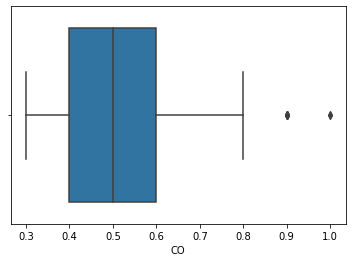

In [ ]:
sns.boxplot(df_raw_x['CO'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


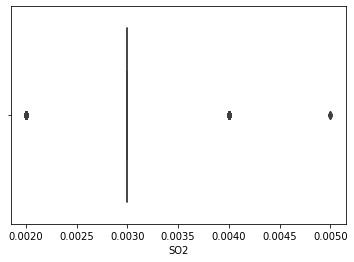

In [ ]:
sns.boxplot(df_raw_x['SO2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


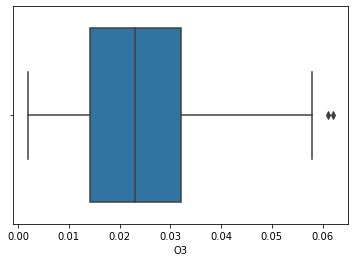

In [ ]:
sns.boxplot(df_raw_x['O3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


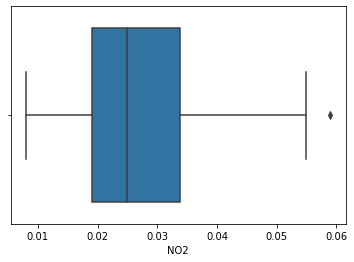

In [ ]:
sns.boxplot(df_raw_x['NO2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


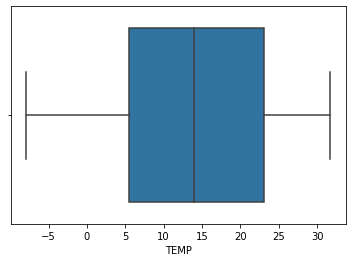

In [ ]:
sns.boxplot(df_raw_x['TEMP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


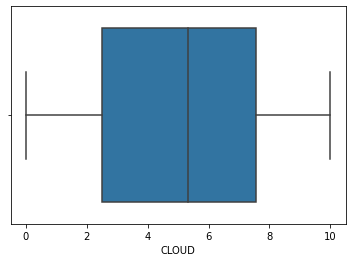

In [ ]:
sns.boxplot(df_raw_x['CLOUD'])

- CO, SO2, O3, NO2에서 이상치가 각각 2개, 3개, 2개, 1개 발견된다.
- TEMP와 CLOUD의 데이터는 이상치 없이 모두 사분위수 범위 내에 분포하고 있다.

In [ ]:
q1, q3 = np.percentile(df_raw_x['O3'], [25, 75])
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

In [ ]:
for cols in df_raw_x.columns :

    outlier_idx = pd.DataFrame()

    outlier = pd.DataFrame(df_raw_x.loc[(df_raw_x[cols] < lower) | (df_raw_x[cols] > upper), cols])
    result = pd.concat([outlier_idx, outlier], axis = 0)

result

,CLOUD
0,5.695652
1,3.833333
2,6.291667
3,2.541667
4,3.916667
...,...
361,8.727273
362,6.208333
363,2.625000
364,7.583333


# **VITAL FEW : 미세먼지 발생에 영향을 미치는 주요 요인 선정하기**

### **변수 시각화하기**

**CO, SO2, O3, NO2의 분포 확인하기**

Text(0, 0.5, 'count')

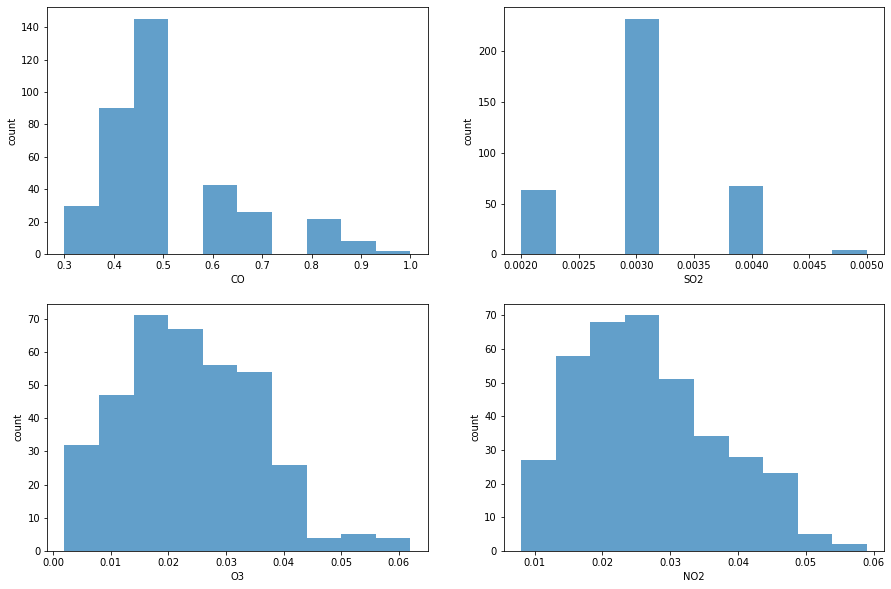

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15,10))

axes[0,0].hist(df_raw_x['CO'], label = 'CO', alpha = 0.7)
axes[0,0].set_xlabel('CO')
axes[0,0].set_ylabel('count')

axes[0,1].hist(df_raw_x['SO2'], label = 'SO2', alpha = 0.7)
axes[0,1].set_xlabel('SO2')
axes[0,1].set_ylabel('count')

axes[1,0].hist(df_raw_x['O3'], label = 'O3', alpha = 0.7)
axes[1,0].set_xlabel('O3')
axes[1,0].set_ylabel('count')

axes[1,1].hist(df_raw_x['NO2'], label = 'NO2', alpha = 0.7)
axes[1,1].set_xlabel('NO2')
axes[1,1].set_ylabel('count')

- O3, NO2 의 데이터는 왼쪽으로 치우쳐 있는 것으로 보아 왜도가 양수일 것으로 예상된다.

## **변수 중요도 확인하기**

#### **의사결정나무(Decision Tree)**

In [ ]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(df_train_x, df_train_y)

print('Model Score on train set : {:.3f}'.format(dt_regressor.score(df_train_x, df_train_y)))
print('Model Score on test set : {:.3f}'.format(dt_regressor.score(df_test_x, df_test_y)))

Model Score on train set : 1.000
Model Score on test set : -0.269


In [ ]:
dt_importance = pd.DataFrame()
dt_importance['Feature'] = df_train_x.columns
dt_importance['Importance'] = dt_regressor.feature_importances_

dt_importance.sort_values('Importance', ascending = False, inplace = True)
dt_importance.round(3).head()

,Feature,Importance
2,CO,0.450
11,CLOUD,0.102
9,ATM_PRESS,0.089
0,O3,0.081
4,TEMP,0.079


**<모델 성능>**
- 기본 의사결정나무는 train과 test 데이터에 대해 각각 100%, 7.8%의 성능을 보여주고 있다. 
- Train 데이터에 있어서 매우 과대적합인 것으로 확인되며, 이는 모델의 성능이 매우 좋지 않다는 점을 의미한다.


**<변수 중요도>**
- 의사결정나무 모델을 통해 변수 중요도를 추출해보았다. 
- CO가 0.450, CLOUD가 0.102, ATM_PRES가 0.089, O3이 0.081, 그리고 TEMP가 0.079의 변수 중요도를 보여주고 있다.

#### **랜덤 포레스트 (Random Forest)**

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(df_train_x, df_train_y)

print('Model Score on train set : {:.3f}'.format(rf_regressor.score(df_train_x, df_train_y)))
print('Model Score on test set : {:.3f}'.format(rf_regressor.score(df_test_x, df_test_y)))

Model Score on train set : 0.921
Model Score on test set : 0.381


In [ ]:
rf_importance = pd.DataFrame()
rf_importance['Feature'] = df_train_x.columns
rf_importance['Importance'] = rf_regressor.feature_importances_

rf_importance.sort_values('Importance', ascending = False, inplace = True)
rf_importance.round(3).head()

,Feature,Importance
2,CO,0.388
0,O3,0.103
4,TEMP,0.086
11,CLOUD,0.082
1,NO2,0.069


**<모델 성능>**
- 기본 랜덤포레스트 예측 모델은 train과 test 데이터에 대해 각각 92.1%, 38.1%의 설명력을 갖는다.
- 의사결정나무에 비해서는 과대적합의 경향성이 적어보이지만, 여전히 모델의 일반화 가능성은 높아 보이지 않는다.

**<변수 중요도>**
- CO가 0.388, O3이 0.013, TEMP가 0.086, CLOUD가 0.082, 그리고 NO2가 0.069의 변수 중요도를 가진다.

#### **그래디언트 부스팅 (Gradient Boosting)**

In [ ]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(df_train_x, df_train_y)

print('Model Score on train set : {:.3f}'.format(gb_regressor.score(df_train_x, df_train_y)))
print('Model Score on test set : {:.3f}'.format(gb_regressor.score(df_test_x, df_test_y)))

Model Score on train set : 0.933
Model Score on test set : 0.364


In [ ]:
gb_importance = pd.DataFrame()
gb_importance['Feature'] = df_train_x.columns
gb_importance['Importance'] = gb_regressor.feature_importances_

gb_importance.sort_values('Importance', ascending = False, inplace = True)
gb_importance.round(3).head()

,Feature,Importance
2,CO,0.429
0,O3,0.130
4,TEMP,0.119
11,CLOUD,0.084
7,WIND_DIR,0.065


**<모델 성능>**
- 기본 그래디언트 부스팅 모델은 train과 test 데이터에 대해 각각 93.3%, 36.4%의 설명력을 갖는다.
- 의사결정나무에 비해서 모델의 성능이 양호한 것으로 판단되나, 여전히 과대적합의 문제점을 가지고 있다.

**<변수 중요도>**
- CO가 0.429, O3이 0.130, TEMP가 0.119, CLOUD가 0.084, 그리고 WIND_DIR가 0.065의 변수 중요도를 갖는다.

#### **결론**

- 의사결정나무, 랜덤 포레스트, 그리고 그래디언트 부스팅 예측기를 이용하여 추출한 변수 중요도는 다음과 같다.


| 모델명/순위 |  의사결정나무  |  랜덤 포레스트   |  그래디언트 부스팅  |
|------------|:--------------:|:----------------:|:------------------:|
|   1    |CO (0.450)          | CO (0.388)       |CO (0.429)          |
|   2    |CLOUD (0.102)       | O3 (0.103)       | O3 (0.130)         |
|   3    |ATM_PRESS (0.089)   |TEMP (0.086)      |TEMP (0.119)        |
|   4    |O3 (0.081)          | CLOUD (0.082)    |CLOUD (0.084)       |
|   5    |TEMP (0.079)        |NO2 (0.069)       |WIND_DIR (0.065)    |

* 3개의 예측 모델 모두 중요하게 고려한 변수는 CO, O3, TEMP, CLOUD이다.
* 일산화탄소 농도가 미세먼지 발생에 압도적인 영향을 미치며, 오존 농도, 기온, 전운량 또한 미세먼지를 유발하는 주요한 원인이라는 점을 파악할 수 있다.

### **다중선형 회귀분석**

#### **변수 간 다중공선성 확인하기**

In [ ]:
df_train_x = df_train.drop('PM10', axis = 1, inplace = False)
df_train_y = df_train['PM10']

In [ ]:
df_train_x.head()

,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,0.030,0.013,0.4,0.002,21.641667,0.00,1.958333,151.666667,69.750,996.129167,0.0,6.875000
142,0.014,0.030,0.5,0.003,0.466667,0.00,1.650000,231.666667,36.375,1020.670833,0.0,0.041667
76,0.029,0.014,0.5,0.002,24.091667,0.00,1.687500,298.750000,72.000,1000.845833,0.0,5.083333
109,0.015,0.034,0.4,0.003,16.862500,0.00,2.491667,290.000000,58.250,1012.195833,0.0,7.041667
339,0.036,0.017,0.4,0.002,21.908333,0.02,2.679167,266.250000,79.875,993.962500,0.0,8.041667


In [ ]:
df_train_y.head()

307    25.0
142    20.0
76     14.0
109    18.0
339    45.0
Name: PM10, dtype: float64

In [ ]:
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
df_vif.sort_values('VIF', ascending = False).round(3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variable,VIF
0,const,75737.876
2,NO2,5.192
10,ATM_PRESS,4.979
5,TEMP,4.507
3,CO,3.643
9,HUMIDITY,2.783
1,O3,2.760
12,CLOUD,2.210
4,SO2,2.033
7,WIND,1.938


- 설명변수 간 다중공선성은 확인되지 않는다.
- 무리없이 회귀분석을 진행해도 좋을 것으로 판단된다.

#### **모델 생성하기 및 해석하기**

In [ ]:
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + SNOW + CLOUD",
                    data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     23.31
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           4.32e-34
Time:                        04:13:44   Log-Likelihood:                -961.92
No. Observations:                 256   AIC:                             1950.
Df Residuals:                     243   BIC:                             1996.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    357.7070    183.008      1.955      0.0

**<모델의 자유도 및 유의성 확인하기>**
- 해당 회귀모형은 총 256개의 관측값을 가지고 있으며, 잔차와 모델의 자유도는 각각 243개와 12개이다.
- F통계량 23.31에 대한 유의확률 = 4.32e-34 < 0.05이므로 모델이 유의하다는 결론을 내릴 수 있다.
- 이 모델의 수정결정계수는 0.512이며, 약 51.2%의 다소 약한 설명력을 갖는다.

**<회귀계수의 유의성 확인하기>**
- O3, NO2, CO, TEMP, WIND_DIR, ATM_PRESS의 t통계량은 각각 5.820, 3.079, 6.596, -4.353, 2.857, -2.117이다.
- 각각의 설명변수에 대한 유의확률 0.000, 0.002, 0.000, 0.000, 0.005, 0.035 < 0.05이므로 회귀계수의 유의성을 받아들일 수 있다.

#### **모델 생성하기 및 해석하기 w/ scaling**

In [ ]:
df_train.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,25.0,0.030,0.013,0.4,0.002,21.641667,0.00,1.958333,151.666667,69.750,996.129167,0.0,6.875000
142,20.0,0.014,0.030,0.5,0.003,0.466667,0.00,1.650000,231.666667,36.375,1020.670833,0.0,0.041667
76,14.0,0.029,0.014,0.5,0.002,24.091667,0.00,1.687500,298.750000,72.000,1000.845833,0.0,5.083333
109,18.0,0.015,0.034,0.4,0.003,16.862500,0.00,2.491667,290.000000,58.250,1012.195833,0.0,7.041667
339,45.0,0.036,0.017,0.4,0.002,21.908333,0.02,2.679167,266.250000,79.875,993.962500,0.0,8.041667


In [ ]:
scaler = StandardScaler()
df_train_x_scaled = scaler.fit_transform(df_train_x)

print(df_train_x_scaled.shape)
print(type(df_train_x_scaled))
df_train_x_scaled

(256, 12)
<class 'numpy.ndarray'>


array([[ 5.21376762e-01, -1.30553681e+00, -7.86186943e-01, ...,
        -1.14687352e+00, -1.16445375e-01,  5.98810765e-01],
       [-8.25129679e-01,  3.54806905e-01, -7.50072348e-02, ...,
         1.80887078e+00, -1.16445375e-01, -1.68016006e+00],
       [ 4.37220109e-01, -1.20786953e+00, -7.50072348e-02, ...,
        -5.78808577e-01, -1.16445375e-01,  1.27573165e-03],
       ...,
       [-1.07759964e+00,  1.72214879e+00,  1.34735218e+00, ...,
        -3.97650051e-01, -1.16445375e-01,  9.18422526e-01],
       [ 8.58003372e-01, -1.20786953e+00, -1.49736665e+00, ...,
        -2.09967818e-01, -1.16445375e-01,  1.52985372e+00],
       [ 6.89690067e-01,  5.50141460e-01, -7.50072348e-02, ...,
        -1.08565098e+00, -1.16445375e-01, -1.23789740e-01]])

In [ ]:
df_train_x_scaled = pd.DataFrame(df_train_x_scaled, columns = df_train_x.columns)
df_train_x_scaled.index = df_train_x.index

print(df_train_x_scaled.shape)
df_train_x_scaled.head()

(256, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,0.521377,-1.305537,-0.786187,-1.562294,0.788661,-0.326210,-0.373910,-0.792838,0.628160,-1.146874,-0.116445,0.598811
142,-0.825130,0.354807,-0.075007,-0.035778,-1.338089,-0.326210,-0.797766,0.316031,-1.662743,1.808871,-0.116445,-1.680160
76,0.437220,-1.207870,-0.075007,-1.562294,1.034731,-0.326210,-0.746216,1.245863,0.782603,-0.578809,-0.116445,0.001276
109,-0.740973,0.745476,-0.786187,-0.035778,0.308656,-0.326210,0.359246,1.124581,-0.161215,0.788160,-0.116445,0.654395
339,1.026317,-0.914868,-0.786187,-1.562294,0.815444,-0.309976,0.616996,0.795385,1.323153,-1.407822,-0.116445,0.987903


In [ ]:
df_train_scaled = pd.concat([df_train_y, df_train_x_scaled], axis = 1)
df_train_scaled.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,25.0,0.521377,-1.305537,-0.786187,-1.562294,0.788661,-0.326210,-0.373910,-0.792838,0.628160,-1.146874,-0.116445,0.598811
142,20.0,-0.825130,0.354807,-0.075007,-0.035778,-1.338089,-0.326210,-0.797766,0.316031,-1.662743,1.808871,-0.116445,-1.680160
76,14.0,0.437220,-1.207870,-0.075007,-1.562294,1.034731,-0.326210,-0.746216,1.245863,0.782603,-0.578809,-0.116445,0.001276
109,18.0,-0.740973,0.745476,-0.786187,-0.035778,0.308656,-0.326210,0.359246,1.124581,-0.161215,0.788160,-0.116445,0.654395
339,45.0,1.026317,-0.914868,-0.786187,-1.562294,0.815444,-0.309976,0.616996,0.795385,1.323153,-1.407822,-0.116445,0.987903


In [ ]:
reg_scaled_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + SNOW + CLOUD",
                           data = df_train)

reg_scaled_result = reg_scaled_model.fit()
print(reg_scaled_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     23.31
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           4.32e-34
Time:                        04:45:03   Log-Likelihood:                -961.92
No. Observations:                 256   AIC:                             1950.
Df Residuals:                     243   BIC:                             1996.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    357.7070    183.008      1.955      0.0

**<모델의 자유도 및 유의성 확인하기>**
- 해당 회귀모형은 총 256개의 관측값을 가지고 있으며, 잔차와 모델의 자유도는 각각 243개와 12개이다.
- F통계량 23.31에 대한 유의확률 = 4.32e-34 < 0.05이므로 모델이 유의하다는 결론을 내릴 수 있다.
- 이 모델의 수정결정계수는 0.512이며, 약 51.2%의 다소 약한 설명력을 갖는다.

**<회귀계수의 유의성 확인하기>**
- O3, NO2, CO, TEMP, WIND_DIR, ATM_PRESS의 t통계량은 각각 5.820, 3.079, 6.596, -4.353, 2.857, -2.117이다.
- 각각의 설명변수에 대한 유의확률 0.000, 0.002, 0.000, 0.000, 0.005, 0.035 < 0.05이므로 회귀계수의 유의성을 받아들일 수 있다.

#### **잔차의 가정 확인하기**

**등분산성**

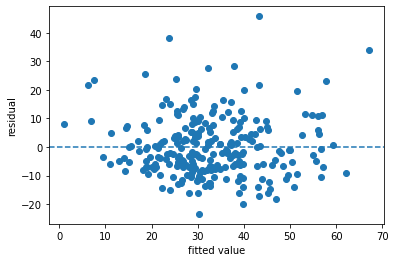

In [ ]:
plt.scatter(reg_scaled_result.fittedvalues, reg_scaled_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

- 잔차가 y=0을 기준으로 random하게 산포되어 있으므로 등분산성을 만족하는 것으로 볼 수 있다.

**독립성**

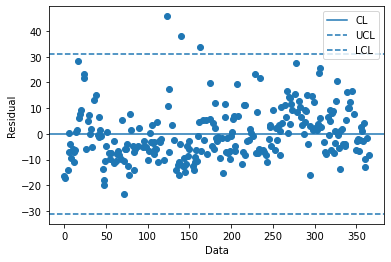

In [ ]:
plt.scatter(df_train.index, reg_scaled_result.resid)
plt.xlabel('Data'); plt.ylabel('Residual')
plt.axhline(y = 0, linestyle = '-', label = 'CL')
plt.axhline(y = 3 * np.std(reg_scaled_result.resid), linestyle = '--', label = 'UCL')
plt.axhline(y = -3 * np.std(reg_scaled_result.resid), linestyle = '--', label = 'LCL')
plt.legend()

- 3개의 데이터가 관리상한선을 벗어나 분포되어 있다.
- 전반적으로 독립성을 만족하는 것으로 해석할 수 있다.

#### **규제화 적용하기**

In [ ]:
elastic = ElasticNet(alpha = 1,
                     l1_ratio = 0.5)
elastic.fit(df_train_x_scaled, df_train_y)
print('intercept : {}\n'.format(elastic.intercept_))

df_elastic_coef = pd.DataFrame({'Coef' : elastic.coef_},
                               index = df_train_x.columns)
df_elastic_coef.sort_values(by = 'Coef', ascending = False)

intercept : 32.640625



,Coef
CO,4.517786
SO2,1.938559
O3,1.725914
NO2,1.625055
WIND_DIR,0.626001
WIND,-0.000000
ATM_PRESS,0.000000
SNOW,0.000000
HUMIDITY,-0.042659
RAIN,-0.244778


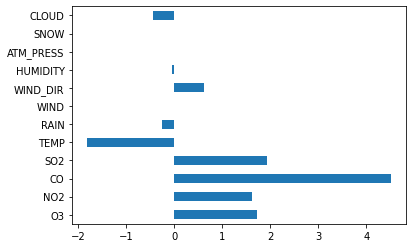

In [ ]:
df_elastic_coef.plot.barh(y = 'Coef', legend = False)

- CO, SO2, O3, NO2는 PM10과 양의 인과관계를 가지며, TEMP의 경우 음의 인과관계를 갖는다.
- CO, SO2, O3, NO2의 농도가 높아질수록 & 온도가 낮아질수록 미세먼지의 농도가 높아진다는 것을 확인할 수 있다.

# **MODELING : 선정한 요인을 이용하여 미세먼지 발생 예측 모델 만들기**

### **Vital few로 선정한 설명변수 구성하기**

In [ ]:
df_raw_x_vf = df_raw_x[['O3', 'NO2', 'CO', 'SO2','TEMP', 'CLOUD']]

print(df_raw_x_vf.shape)
df_raw_x_vf.head()

(366, 6)


,O3,NO2,CO,SO2,TEMP,CLOUD
0,0.054,0.021,0.5,0.003,24.034783,5.695652
1,0.053,0.020,0.5,0.003,24.287500,3.833333
2,0.042,0.023,0.4,0.003,24.175000,6.291667
3,0.034,0.026,0.4,0.003,25.354167,2.541667
4,0.045,0.035,0.5,0.003,27.295833,3.916667


In [ ]:
df_train_x_vf, df_test_x_vf, df_train_y_vf, df_test_y_vf = train_test_split(df_raw_x_vf,
                                                                            df_raw_y,
                                                                            test_size = 0.3)

In [ ]:
print(df_train_x_vf.shape)
df_train_x_vf.head()

(256, 6)


,O3,NO2,CO,SO2,TEMP,CLOUD
138,0.004,0.045,0.8,0.003,6.858333,5.458333
47,0.061,0.016,0.5,0.003,26.025000,5.333333
216,0.020,0.029,0.8,0.004,1.475000,5.875000
25,0.021,0.027,0.5,0.002,25.058333,9.875000
253,0.023,0.021,0.6,0.003,7.054167,8.291667


In [ ]:
print(df_train_y_vf.shape)
df_train_y_vf.head()

(256,)


138    33.0
47     29.0
216    68.0
25     22.0
253    38.0
Name: PM10, dtype: float64

In [ ]:
print(df_test_x_vf.shape)
df_test_x_vf.head()

(110, 6)


,O3,NO2,CO,SO2,TEMP,CLOUD
178,0.014,0.030,0.6,0.003,2.475000,7.208333
81,0.014,0.029,0.4,0.003,19.383333,8.708333
363,0.044,0.009,0.4,0.003,25.033333,2.625000
236,0.031,0.015,0.6,0.003,4.500000,6.583333
248,0.028,0.019,0.5,0.003,1.095833,0.000000


In [ ]:
print(df_test_y_vf.shape)
df_test_y_vf.head()

(110,)


178    46.0
81     22.0
363    27.0
236    68.0
248    34.0
Name: PM10, dtype: float64

### **Vital Few를 이용하여 의사결정나무(Decision Tree) 모델링하기**

In [ ]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(df_train_x_vf, df_train_y_vf)

print('Model Score on train set : {:.3f}'.format(dt_regressor.score(df_train_x_vf, df_train_y_vf)))
print('Model Score on test set : {:.3f}'.format(dt_regressor.score(df_test_x_vf, df_test_y_vf)))

Model Score on train set : 1.000
Model Score on test set : -0.202


#### **모델 파라미터 설정하기 : min_samples_leaf**

In [ ]:
train_score = []; test_score = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,20)]

for v_min_samples in para_leaf :
    dt = DecisionTreeRegressor(min_samples_leaf = v_min_samples)
    dt.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(dt.score(df_train_x_vf, df_train_y_vf))
    test_score.append(dt.score(df_test_x_vf, df_test_y_vf))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [ ]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.938,0.058
1,4,0.816,0.063
2,6,0.740,0.071
3,8,0.706,0.097
4,10,0.671,0.142
5,12,0.614,0.148
6,14,0.600,0.136
7,16,0.594,0.137
8,18,0.592,0.133
9,20,0.560,0.164


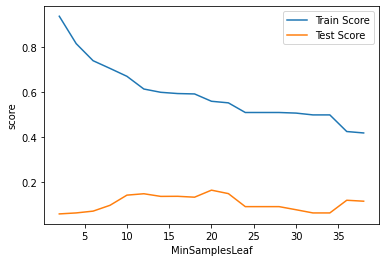

In [ ]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 train과 test에 대한 모델의 성능이 감소하거나 변화가 거의 없다.
- TrainScore가 0.560, TestScore가 0.164인 **min_samples_leaf = 20**을 선택한다.

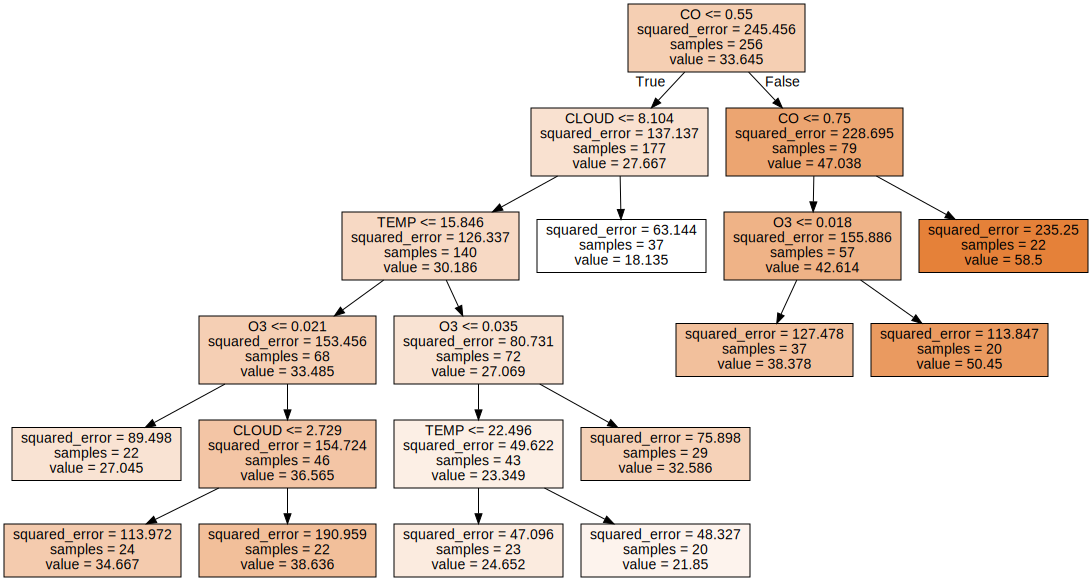

In [ ]:
v_feature_name = df_train_x_vf.columns

tree_graph = DecisionTreeRegressor(min_samples_leaf = 20)
tree_graph.fit(df_train_x_vf, df_train_y_vf)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### **모델 파라미터 설정하기 : min_samples_split**

In [ ]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1,20)]

for v_min_split in para_split :
    dt = DecisionTreeRegressor(min_samples_leaf = 20,
                               min_samples_split = v_min_split)
    dt.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(dt.score(df_train_x_vf, df_train_y_vf))
    test_score.append(dt.score(df_test_x_vf, df_test_y_vf))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [ ]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.56,0.164
1,4,0.56,0.164
2,6,0.56,0.164
3,8,0.56,0.164
4,10,0.56,0.164
5,12,0.56,0.164
6,14,0.56,0.164
7,16,0.56,0.164
8,18,0.56,0.164
9,20,0.56,0.164


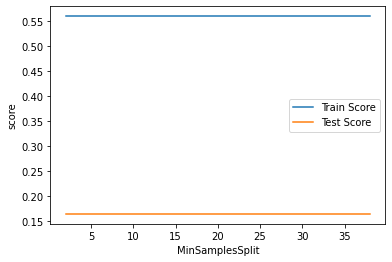

In [ ]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수에 변화가 생겨도 train과 test 데이터에 대한 모델의 성능에는 변화가 없다.
- 모델을 구체화시키기 위해 **min_samples_split = 10**으로 설정한다.

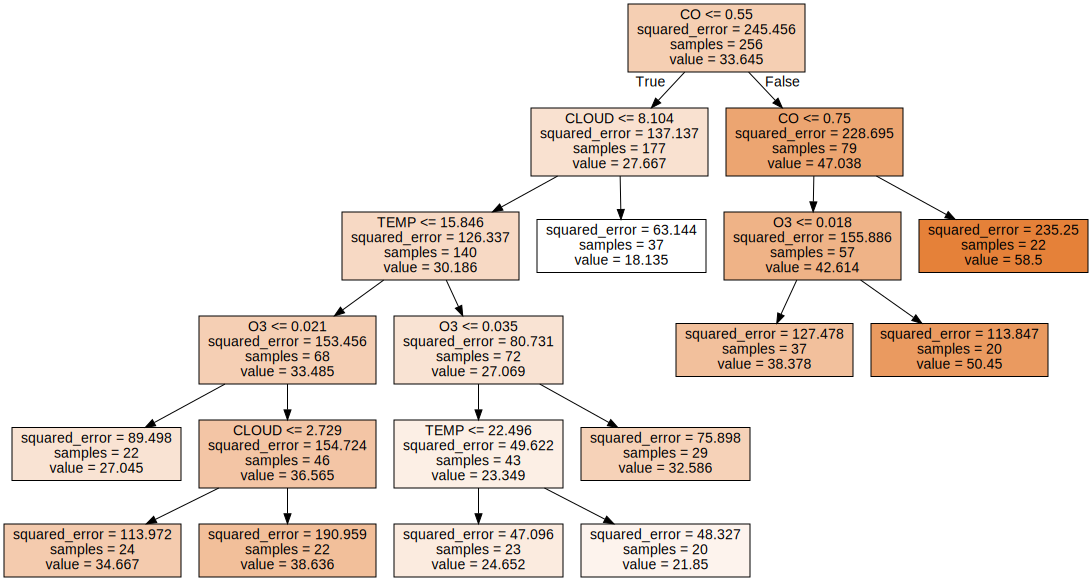

In [ ]:
v_feature_name = df_train_x_vf.columns

tree_graph = DecisionTreeRegressor(min_samples_leaf = 20,
                                   min_samples_split = 10)
tree_graph.fit(df_train_x_vf, df_train_y_vf)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### **모델 파라미터 설정하기 :max_depth**

In [ ]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,10)]

for v_depth in para_depth :
    dt = DecisionTreeRegressor(min_samples_leaf = 20,
                               min_samples_split = 10,
                               max_depth = v_depth)
    dt.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(dt.score(df_train_x_vf, df_train_y_vf))
    test_score.append(dt.score(df_test_x_vf, df_test_y_vf))

df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [ ]:
df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.326,0.140
1,2,0.458,0.104
2,3,0.511,0.138
3,4,0.556,0.152
4,5,0.560,0.164
5,6,0.560,0.164
6,7,0.560,0.164
7,8,0.560,0.164
8,9,0.560,0.164


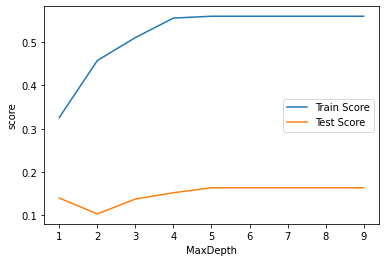

In [ ]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MaxDepth')
plt.legend()

- 나무의 최대 깊이가 커질수록 train과 test 데이터에 대한 모델의 성능이 증가하고 감소하다가, 4를 넘어서면서 모델 성능에 변화가 생기지 않는다.
- 모델의 과대적합을 막기 위해 **max_depth = 5**로 설정한다.

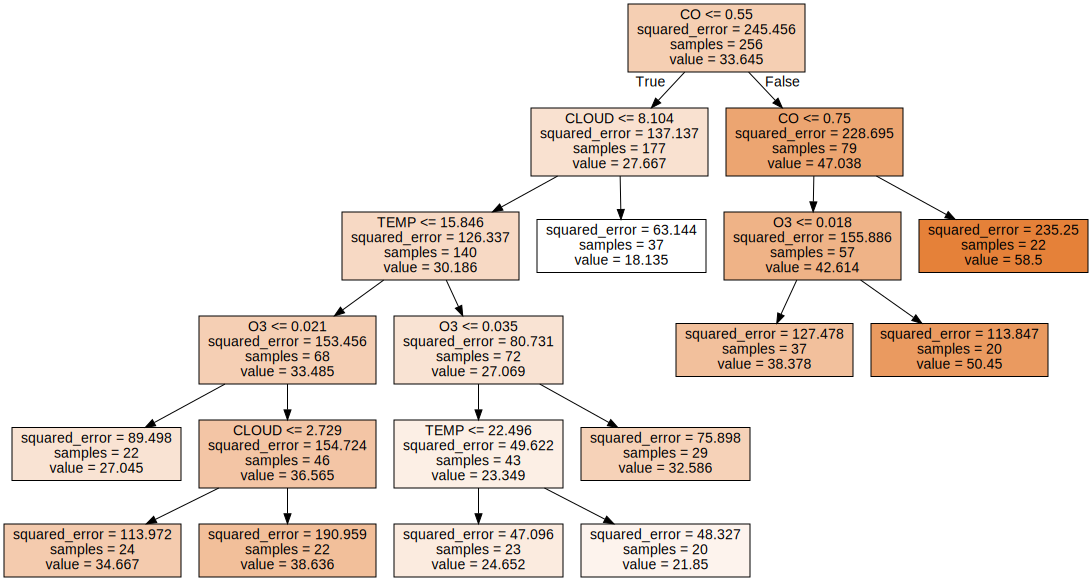

In [ ]:
v_feature_name = df_train_x_vf.columns

tree_graph = DecisionTreeRegressor(min_samples_leaf = 20,
                                   min_samples_split = 5,
                                   max_depth = 10)
tree_graph.fit(df_train_x_vf, df_train_y_vf)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### **의사결정나무의 최종 모델 생성하기 및 평가하기**

In [ ]:
dt_final = DecisionTreeRegressor(min_samples_leaf = 20,
                                 min_samples_split = 10,
                                 max_depth = 5)
dt_final.fit(df_train_x_vf, df_train_y_vf)

print('Score on training set : {:.3f}'.format(dt_final.score(df_train_x_vf, df_train_y_vf)))
print('Score on test set : {:.3f}'.format(dt_final.score(df_test_x_vf, df_test_y_vf)))

Score on training set : 0.560
Score on test set : 0.164


- 의사결정나무로 이끌어낸 모델의 성능은 train과 test 데이터에 대해 각각 56%, 16.4%이다.
- Train 데이터에 대해 모델의 과대적합이 발생한 것으로 보이며, 전체적인 모델의 성능 또한 좋지 않다는 결론을 내릴 수 있다.

### **Vital Few를 이용하여 그래디언트 부스팅(Gradient Boosting) 모델링하기**

#### **모델 파라미터 설정하기 : n_estimators**

In [ ]:
train_score = []; test_score = []
para_n_tree = [n_tree * 20 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_n_tree = pd.DataFrame()
df_score_n_tree['n_estimators'] = para_n_tree
df_score_n_tree['TrainScore'] = train_score
df_score_n_tree['TestScore'] = test_score

In [ ]:
df_score_n_tree.round(3)

,n_estimators,TrainScore,TestScore
0,20,0.715,0.238
1,40,0.809,0.254
2,60,0.861,0.268
3,80,0.892,0.279
4,100,0.914,0.287
5,120,0.928,0.290
6,140,0.941,0.294
7,160,0.950,0.296
8,180,0.958,0.296
9,200,0.966,0.303


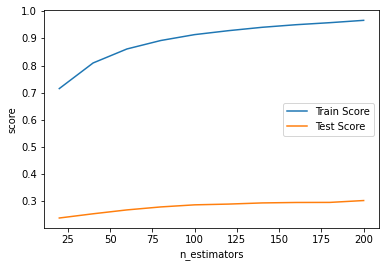

In [ ]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

- 나무의 개수가 늘어날수록 train과 test 데이터에 대한 모델의 성능이 모두 향상된다.
- 모델의 성능을 최대로 끌어올리기 위해 **n_estimators = 200**으로 설정한다.

#### **모델 파라미터 설정하기 : min_samples_leaf**

In [ ]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_leaf in para_leaf :
    gb = GradientBoostingRegressor(n_estimators = 200,
                                   min_samples_leaf = v_min_leaf)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [ ]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.966,0.296
1,2,0.951,0.329
2,3,0.961,0.336
3,4,0.954,0.308
4,5,0.946,0.336
5,6,0.942,0.320
6,7,0.932,0.318
7,8,0.924,0.328
8,9,0.920,0.348
9,10,0.915,0.320


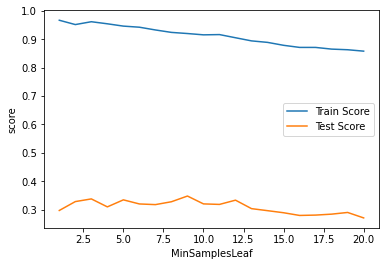

In [ ]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 train과 test 데이터에 대한 모델의 성능이 감소한다.
- TrainScore가 0.920, TestScore가 0.348인 **min_samples_leaf = 9**를 선택한다.

#### **모델 파라미터 설정하기 : min_samples_split**

In [ ]:
train_score = []; test_score = []
para_split = [n_split * 3 for n_split in range(1,21)]

for v_min_split in para_split :
    gb = GradientBoostingRegressor(n_estimators = 200,
                                   min_samples_leaf = 9,
                                   min_samples_split = v_min_leaf)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [ ]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,3,0.915,0.344
1,6,0.915,0.344
2,9,0.915,0.344
3,12,0.915,0.344
4,15,0.915,0.344
5,18,0.915,0.344
6,21,0.915,0.344
7,24,0.915,0.344
8,27,0.915,0.344
9,30,0.915,0.344


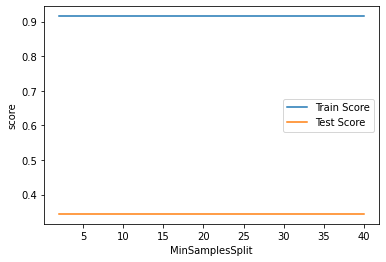

In [ ]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수가 증가하여도 모델의 성능에 변화가 없다.
- 해당 하이퍼파라미터는 포함시키지 않는 것으로 결정한다.

#### **모델 파라미터 설정하기 : max_depth**

In [ ]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_depth in para_depth :
    gb = GradientBoostingRegressor(n_estimators = 200,
                                   min_samples_leaf = 9,
                                   max_depth = v_depth)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [ ]:
df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.645,0.242
1,2,0.831,0.327
2,3,0.920,0.348
3,4,0.956,0.342
4,5,0.974,0.348
5,6,0.983,0.319
6,7,0.988,0.322
7,8,0.992,0.345
8,9,0.994,0.321
9,10,0.996,0.292


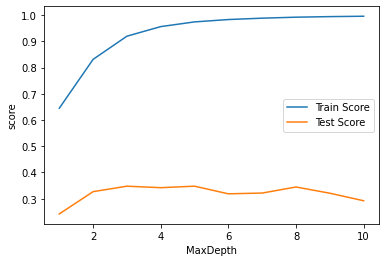

In [ ]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MaxDepth')
plt.legend()

- 모델의 최대 깊이가 커질수록 train 데이터에 대한 과대적합 현상이 심해질 뿐, test 데이터에 대한 모델의 성능은 크게 변하지 않는다.
- 모델의 일반화 가능성을 최대화하기 위해 **max_depth = 5**로 설정한다.

#### **모델 파라미터 설정하기 : learning_rate**

In [ ]:
train_score = []; test_score = []
para_lr = [lr * 0.01 for lr in range(1,21)]

for v_learning_rate in para_lr :
    gb = GradientBoostingRegressor(n_estimators = 200,
                                   min_samples_leaf = 9,
                                   max_depth = 5,
                                   learning_rate = v_learning_rate)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [ ]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.01,0.773,0.301
1,0.02,0.861,0.299
2,0.03,0.901,0.319
3,0.04,0.920,0.312
4,0.05,0.941,0.323
5,0.06,0.951,0.321
6,0.07,0.962,0.322
7,0.08,0.963,0.329
8,0.09,0.972,0.340
9,0.10,0.974,0.348


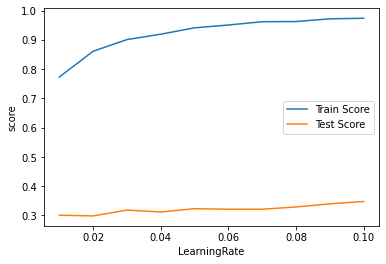

In [ ]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('LearningRate')
plt.legend()

- 학습률이 높아질수록 train과 test 데이터에 대한 모델의 성능이 증가한다.
- 과대적합의 우려의 있기 때문에 **learning_rate = 0.10**으로 설정한다.

#### **그래디언트 부스팅의 최종 모델 생성하기 및 평가하기**

In [ ]:
gb_final = GradientBoostingRegressor(n_estimators = 200,
                                     min_samples_leaf = 9,
                                     max_depth = 5,
                                     learning_rate = 0.1)
gb_final.fit(df_train_x_vf, df_train_y_vf)

print('Score on training set : {:.3f}'.format(gb_final.score(df_train_x_vf, df_train_y_vf)))
print('Score on test set : {:.3f}'.format(gb_final.score(df_test_x_vf, df_test_y_vf)))

Score on training set : 0.974
Score on test set : 0.348


- 그래디언트 부스팅으로 이끌어낸 모델의 성능은 train과 test 데이터에 대해 각각 97.4%, 34.8%이다.
- Train 데이터에 대해 모델이 여전히 과대적합되어 있는 것으로 보인다.